<a href="https://colab.research.google.com/github/alaeddinehamroun/TensorFlow-Developer-Professional-Certificate-Preparation/blob/main/C1%2BC2_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Prices

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
def house_model():
  xs = np.arange(1, 7)
  ys = np.array([1, 1.5, 2, 2.5, 3, 3.5], dtype=float)
  print(xs)
  print(ys)
  # Define the model
  model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
  # Compile the model
  model.compile(optimizer="sgd", loss="mean_squared_error")
  # Train the model
  model.fit(xs, ys, epochs=1000)

  return model

In [ ]:
model = house_model()

In [ ]:
# Prediction
new_y = 7.0
prediction = model.predict([new_y])[0]
print(prediction)

1/1 [==============================] - 0s 172ms/step
[4.006959]


In [ ]:
#tf.keras.Sequential(layers=None, name=None):
#   Groups a linear stack of layers into a tf.keras.Model
#   Args: 
#     layers - optional list of layers to add to the model
#     name - optional name for the model
#   Methods:
#     add(layer): adds a layer instance on top of the layer stack
#     compile (optimizer='rmsprop',         String(name of optimizer) or optimizer instance
#              loss=None,                   Loss function (string of instance of tf.keras.losses.Loss)               
#              metrics=None,                List of metrics to be evaluated by the model during training and testing
#              loss_weights=None,           -
#              weighted_metrics=None,       -
#              run_eagerly=None,            -
#              steps_per_execution=None,    -
#              jit_compile=None,)           -
#     evaluate(x=None,                      Input data. It could be:
#                                             . A Numpy array or a list of arrays
#                                             . A tensorflow tensor or a list of tensors
#                                             . A dict mapping input names to the corresponding array/tensors.
#                                             . A tf.data dataset.
#                                             . A generator or keras.utils.Sequence 
#              y=None,                      Target data. It could be either Numpy array(s) or Tensorflow tensor(s). It should be consistent with x
#                                           If x is a dataset, y should not be specified (since targets will be obtained from the iterator/dataset)
#              batch_size=None,             Integer or None. Number of samples per batch of computation. If not specified batch_size=32
#                                           Do not specify the batch_size if your data is in the form of a dataset, generators, or keras.utils.Sequence instances (since they generate batches).
#              verbose='auto',              -
#              sample_weight=None,          -
#              steps=None,                  -
#              callbacks=None,              List of keras.callbacks.Callback instances.
#              max_queue_size=10,           -
#              workers=1,                   -
#              use_multiprocessing=False,   -
#              return_dict=False,)          -
#     fit(x=None,
#         y=None,
#         batch_size=None,
#         epochs,...
#         validation_split                  Float between 0 and 1. Fraction of the training data to be used as validation data.
#                                           The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data
#                                           at the end of each epoch...
#         validation_data                   Data on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data.
#         shuffle                           Boolean whether to suffle the training data before each epoch
#         ...)     
#     get_layer(name, index): Retrieves a layer on either its name (unique) or index.
#     load_weights(filepath, ...): Loads all layer weights, either from a Tensorflow or and HDF5 weight file.
#     predict(x, batch_size, ...): Generates output predictions for the input samples
#     reset_states()
#     save(filepath, ...): Saves the model to Tensorflow SavedModel or a single HDF5 file.
#     summary(...): Prints a string summary of the network.
#
#
#

In [ ]:
# tf.keras.losses: built-in loss functions
#       - BinaryCrossentropy
#       - CategoricalCrossentropy
#       - Huber
#       - MeanAbsoluteError
#       - MeanSquaredError
#       ...
# tf.keras.losses.Loss(reduction, name): name - name for the instance

In [ ]:
# tf.keras.metrics: All keras metrics.

# tf.keras.metrics.Metric

In [ ]:
# tf.keras.callbacks: Utilities called at certain points during model training

# tf.keras.callbacks.Callback

# Implementing Callback in Tensorflow

In [ ]:
class myCallback(tf.keras.callbaks.callback):
  def on_epoch_end(self, epoch, logs=None):
    if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99:
      print("\nReached 99% accuracy so cancelling training!")
      # Stop training once the above condition is met
      self.model.stop_training = True

In [ ]:
def create_model(x_train, y_train):
  # Instantiate the callback class
  callbacks = myCallback()

  # Define the model
  model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])

  # Compile the model
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  # Fit the model for 10 epochs adding the callbacks and save the training history
  history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

  return history

# Convolutions

### Pre-process images data

In [ ]:
def reshape_and_normalize(images):
  
  # Reshape the images to add an extra dimension
  images = images.reshape((60000, 28, 28, 1))
  
  # Normalize pixel values
  images = images/255
  
  return images

In [ ]:
def convolutional_model():
  # Define the model
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

  # Compile the model
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
# Save your untrained model
model = convolutional_model()

# Instantiate the callback class
callbacks = myCallback()

# Train your model
history = model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

# Handling Complex Images

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

## Deprecated

### Load and explore the data

In [ ]:
# tf.keras.preprocessing.image: utilities for image preprocessing and augmentation
# load_imag(...): loads an image inot PIL format
# img_to_array(...): converts a PIL image instance to a numpy array
# ImageDataGenerator: generate batches of tensor image data with real-time data augmentation

Sample happy image:


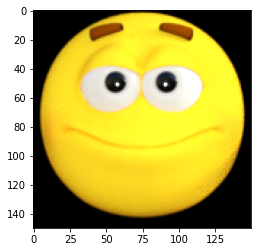


Sample sad image:


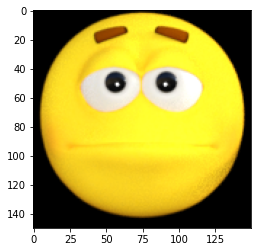

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

base_dir = "./data/"
happy_dir = os.path.join(base_dir, "happy/")
sad_dir = os.path.join(base_dir, "sad/")

print("Sample happy image:")
plt.imshow(load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}"))
plt.show()
print("\nSample sad image:")
plt.imshow(load_img(f"{os.path.join(sad_dir, os.listdir(sad_dir)[0])}"))
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array

# Load the first example of a happy face
sample_image = load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")
print(f"The maximum pixel value is: {np.max(sample_image)}")

Each image has shape: (150, 150, 3)
The maximum pixel value is: 255


### Defining the callback

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.999:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

### Pre-processing

In [ ]:
#tf.keras.preprocessing.image.ImageDataGenerator(
#   featurewise_center=False,
#   samplewise_center=False,
#   featurewise_std_normalization=False,
#   samplewise_std_normalization=False,
#   zca_whitening=False,
#   zca_epsilon=1e-06,
#   rotation_range=0,
#   width_shift_range=0.0,
#   height_shift_range=0.0,
#   brightness_range=None,
#   shear_range=0.0,
#   zoom_range=0.0,
#   channel_shift_range=0.0,
#   fill_mode='nearest',
#   cval=0.0,
#   horizontal_flip=False,
#   vertical_flip=False,
#   rescale=None,
#   preprocessing_function=None,
#   data_format=None,
#   validation_split=0.0,
#   interpolation_order=1,
#   dtype=None
#)
# functions:
#   flow: Takes data & label arrays, generates batches of augmented data.
#(
#   x,  Input data. Numpy array  of rank 4 or a tuple
#   y=None,   Labels
#   batch_size=32,
#   shuffle=True,
#   sample_weight=None,
#   seed=None,
#   save_to_dir=None,
#   save_prefix='',
#   save_format='png',
#   ignore_class_split=False,
#   subset=None
#)   
#    flow_from_dataframe: Takes the dataframe and the path to a directory+ generates batches.
#                         The generated batches contain augmented/normalized data.
#(
#    dataframe,
#    directory=None,
#    x_col='filename',
#    y_col='class',
#    weight_col=None,
#    target_size=(256, 256),
#   color_mode='rgb',
#    classes=None,
#    class_mode='categorical',
#    batch_size=32,
#    shuffle=True,
#    seed=None,
#    save_to_dir=None,
#    save_prefix='',
#     save_format='png',
#     subset=None,
#     interpolation='nearest',
#     validate_filenames=True,
#     **kwargs
# )
#    flow_from_directory: Takes the path to a directory & generates batches of augmented data
# (
#     directory,
#     target_size=(256, 256),
#     color_mode='rgb',
#     classes=None,
#     class_mode='categorical',
#     batch_size=32,
#     shuffle=True,
#     seed=None,
#     save_to_dir=None,
#     save_prefix='',
#     save_format='png',
#     follow_links=False,
#     subset=None,
#     interpolation='nearest',
#     keep_aspect_ratio=False
# )

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def image_generator():
  # Instantiate the ImageDataGenerator class
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale=1/255
  )
  # Specify the method to load images from a directory and pass in the appropriate arguments:
  # - directory: should be a relative path to the directory containing the data
  # - targe_size: set this equal to the resolution of each image (excluding the color dimension)
  # - batch_size: number of images the generator yields when asked for a next batch. Set this to 10.
  # - class_mode: How the labels are represented. Should be one of "binary", "categorical" or "sparse".
  #               Pick the one that better suits here given that the labels are going to be 1D binary labels.
  train_generator = train_datagen.flow_from_directory(directory=base_dir,
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode="binary")
  return train_generator

In [ ]:
gen = image_generator()

Found 2 images belonging to 3 classes.


In [ ]:
def train_happy_sad_model(train_generator):
  # Instantiate the callback
  callbacks = myCallback()

  # Define the model
  model =tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      # The second convolution
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      # The third convolution
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      # Flatten the results to feed into a DNN
      tf.keras.layers.Flatten(),
      # 512 neuron hidden layer
      tf.keras.layers.Dense(512, activation='relu'),
      # Only 1 output neuron. It will contain a value from 0-1
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  # Compile the model
  model.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                metrics=['accuracy'])

  # Traind the model
  history = model.fit(x=gen, epochs=15, callbacks=[callbacks])

  return history

In [ ]:
hist = train_happy_sad_model(gen)

Epoch 1/15
1/1 [==============================] - 2s 2s/step - loss: 0.7638 - accuracy: 0.0000e+00
Epoch 2/15
1/1 [==============================] - 0s 215ms/step - loss: -5.8464 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 219ms/step - loss: -27.0577 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 204ms/step - loss: -96.5503 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 213ms/step - loss: -300.4448 - accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 0s 220ms/step - loss: -800.9643 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 223ms/step - loss: -1855.7012 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 214ms/step - loss: -3863.4573 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================] - 0s 217ms/step - loss: -7425.3745 - accuracy: 0.5000
Epoch 10/15
1/1 [==============================] - 0s 213ms/step - loss: -13099.7178 - accurac

## Not deprecated

Sample happy image:


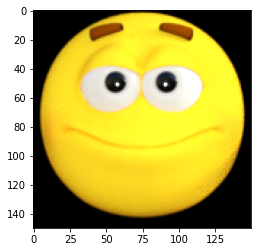


Sample sad image:


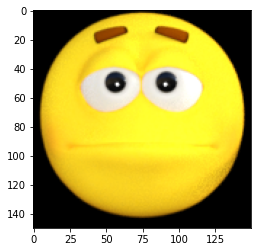

In [ ]:
from tensorflow.keras.utils import load_img

base_dir = "./data/"
happy_dir = os.path.join(base_dir, "happy/")
sad_dir = os.path.join(base_dir, "sad/")

print("Sample happy image:")
plt.imshow(load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}"))
plt.show()
print("\nSample sad image:")
plt.imshow(load_img(f"{os.path.join(sad_dir, os.listdir(sad_dir)[0])}"))
plt.show()

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory


train_ds =image_dataset_from_directory(
      directory=base_dir,
      image_size=(150, 150),
      batch_size=10,
)

class_names = train_ds.class_names
print(class_names)

Found 2 files belonging to 3 classes.
['.ipynb_checkpoints', 'happy', 'sad']


In [ ]:
def train_happy_sad_model(train_generator):
  # Instantiate the callback
  callbacks = myCallback()

  # Define the model
  model =tf.keras.models.Sequential([
      tf.keras.layers.Rescaling(1./255),
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      # The second convolution
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      # The third convolution
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      # Flatten the results to feed into a DNN
      tf.keras.layers.Flatten(),
      # 512 neuron hidden layer
      tf.keras.layers.Dense(512, activation='relu'),
      # Only 1 output neuron. It will contain a value from 0-1
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  # Compile the model
  model.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                metrics=['accuracy'])

  # Traind the model
  history = model.fit(x=gen, epochs=15, callbacks=[callbacks])

  return history

# Using CNN's with the Cats vs Dogs Dataset

In [ ]:
import os 
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [ ]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2022-10-15 15:06:53--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.91.72.223, 2600:1417:7800:4aa::317f, 2600:1417:7800:495::317f
Connecting to download.microsoft.com (download.microsoft.com)|104.91.72.223|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M   168MB/s    in 4.7s    

2022-10-15 15:06:58 (167 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



In [ ]:
source_path = '/tmp/PetImages'

source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')

# Deletes all non-image files (there are two .db files bundled into the dataset)
!find /tmp/PetImages/ -type f ! -name "*.jpg" -exec rm {} +

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12500 images of dogs.
There are 12500 images of cats.


In [ ]:
# Define root directory
root_dir = '/tmp/cats-v-dogs'
# Empty directory to prevent FileExistsError
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
  """
  Creates directories for the train and test sets
  Args:
    root_path (string) - the base directory path to create subdirectories from
  Returns:
    None
  """
  os.makedirs(os.path.join(root_dir, 'training/cats'))
  os.makedirs(os.path.join(root_dir, 'training/dogs'))
  os.makedirs(os.path.join(root_dir, 'validation/cats'))
  os.makedirs(os.path.join(root_dir, 'validation/dogs'))


try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
for rootdir, dirs, files in os.walk(root_dir):
  for subdir in dirs:
    print(os.path.join(rootdir, subdir))

/tmp/cats-v-dogs/validation
/tmp/cats-v-dogs/training
/tmp/cats-v-dogs/validation/cats
/tmp/cats-v-dogs/validation/dogs
/tmp/cats-v-dogs/training/cats
/tmp/cats-v-dogs/training/dogs


In [ ]:
def split_data(source_dir, training_dir, validation_dir, split_size):
  """
  Splits the data into train and test sets

  Args:
    source_dir (string): directory path containing the images
    training_dir (string): directory path to be used for training
    validation_dir (string): directory path to be used for validation
    split_size (float): proportion of the dataset to be used for training
  Returns:
    None
  """
  files = []
  for filename in os.listdir(source_dir):
    file = source_dir + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + ' is zero length, so ignoring.')
    training_length = int(len(files) * split_size)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]
  for filename in training_set:
    src_file = source_dir + filename
    dest_file = training_dir + filename
    copyfile(src_file, dest_file)
  for filename in testing_set:
    src_file = source_dir + filename
    dest_file = validation_dir + filename
    copyfile(src_file, dest_file)

In [ ]:
# Define paths
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
VALIDATION_DIR = "/tmp/cats-v-dogs/validation/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
  for file in os.scandir(VALIDATION_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
  for file in os.scandir(VALIDATION_DOGS_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)

# Check that the number of images matches the expected output
print(f"\n\nThere are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


There are 11249 images of cats for training
There are 11249 images of dogs for training
There are 1250 images of cats for validation
There are 1250 images of dogs for validation


In [ ]:
def train_val_generators(training_dir, validation_dir):
  """
  Creates the training and validation data generators
  Args:
    training_dir (string): directory path containing the training images
    validation_dir (string): directory path containing the testing/validation images
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  # Instantiate the ImageDataGenerator class
  train_datagen = ImageDataGenerator(rescale=1.0/255.)

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=training_dir,
                                                      batch_size=100,
                                                      class_mode='binary',
                                                      target_size=(150, 150))
  # Instantiate the ImageDataGenerator class
  validation_datagen = ImageDataGenerator(rescale=1.0/255.)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
                                                                batch_size=100,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [ ]:
def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
model = create_model()

# Train the model
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
104/225 [============>.................] - ETA: 10:33 - loss: 0.7638 - accuracy: 0.5452

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

225/225 [==============================] - 1311s 6s/step - loss: 0.7024 - accuracy: 0.5904 - val_loss: 0.5944 - val_accuracy: 0.6972
Epoch 2/15
225/225 [==============================] - 1178s 5s/step - loss: 0.5340 - accuracy: 0.7358 - val_loss: 0.4624 - val_accuracy: 0.7900
Epoch 3/15
225/225 [==============================] - 1116s 5s/step - loss: 0.4247 - accuracy: 0.8035 - val_loss: 0.3568 - val_accuracy: 0.8340
Epoch 4/15
225/225 [==============================] - 1122s 5s/step - loss: 0.3643 - accuracy: 0.8371 - val_loss: 0.3220 - val_accuracy: 0.8560
Epoch 5/15
107/225 [=============>................] - ETA: 9:24 - loss: 0.3094 - accuracy: 0.8632

In [ ]:
# Retrieve a list of list results on training and test data sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.show()
print("")

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

# Tackle Overfitting with Data Augmentation

In [ ]:
def train_val_generators(training_dir, validation_dir):
  """
  Creates the training and validation data generators
  Args:
    training_dir (string): directory path containing the training images
    validation_dir (string): directory path containing the testing/validation images
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """

  # Instantiate the ImageDataGenerator class
  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')
  validation_datagen = ImageDataGenerator(rescale=1./255)

  # Pass in the appropriate arguments to the flow_from directory method
  train_generator = train_datagen.flow_from_directory(directory=training_dir,
                                                      batch_size=100,
                                                      class_mode='binary',
                                                      target_size=(150, 150))
  # Instantiate the ImageDataGenerator class
  validation_dataget = ImageDataGenerator(rescale=1./255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
                                                                batch_size=100,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
  return train_generator, validation_generator

In [ ]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

### Not deprecated version

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_ds =image_dataset_from_directory(
      directory=base_dir,
      image_size=(150, 150),
      batch_size=100,
)

class_names = train_ds.class_names
print(class_names)

In [ ]:
def create_model():
  model = tf.keras.models.Sequential([
      ##
      tf.keras.layers.Rescaling(1./255),
      tf.keras.layers.RandomRotation(40),
      tf.keras.layers.RandomZoom(.2)
      tf.keras.layers.RandomFlip(mode="horizontal"),
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

  return model

# Transfer Learning

In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [ ]:
# Get the Horse or Human training dataset
!wget -q -P /content/ https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

# Get the Horse or Human validation dataset
!wget -q -P /content/ https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

test_local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(test_local_zip, 'r')
zip_ref.extractall('/tmp/training')

val_local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(val_local_zip, 'r')
zip_ref.extractall('/tmp/validation')

zip_ref.close()

In [ ]:
# Define the training and validation base directories
train_dir = '/tmp/training'
validation_dir = '/tmp/validation'

# Directory with training horse pictures
train_horses_dir = os.path.join(train_dir, 'horses')
# Directory with training humans pictures
train_humans_dir = os.path.join(train_dir, 'humans')
# Directory with validation hores pictures
validation_horses_dir = os.path.join(validation_dir, 'horses')
# Directory with validation human pictures
validation_humans_dir = os.path.join(validation_dir, 'humans')

# Check the number of images for each class and set
print(f"There are {len(os.listdir(train_horses_dir))} images of horses for training.\n")
print(f"There are {len(os.listdir(train_humans_dir))} images of humans for training.\n")
print(f"There are {len(os.listdir(validation_horses_dir))} images of horses for validation.\n")
print(f"There are {len(os.listdir(validation_humans_dir))} images of humans for validation.\n")

There are 500 images of horses for training.

There are 527 images of humans for training.

There are 128 images of horses for validation.

There are 128 images of humans for validation.



Sample horse image:


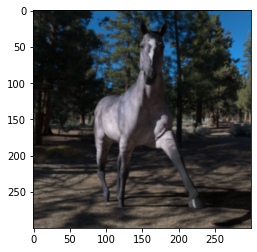


Sample human image:


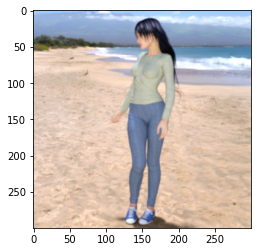

In [ ]:
print("Sample horse image:")
plt.imshow(load_img(f"{os.path.join(train_horses_dir, os.listdir(train_horses_dir)[0])}"))
plt.show()

print("\nSample human image:")
plt.imshow(load_img(f"{os.path.join(train_humans_dir, os.listdir(train_humans_dir)[0])}"))
plt.show()

In [ ]:
# Load the first example of a horse
sample_image = load_img(f"{os.path.join(train_horses_dir, os.listdir(train_horses_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (300, 300, 3)


In [ ]:
def train_val_generators(training_dir, validation_dir):
  """
  Creates the training and validation data generators
  Args:
    training_dir (string) - directory path containing the training images
    validation_dir (string) - directory path containing the testing/validation images
  Returns:
    train_generator, validation_generator: tuple containing the generators
  """
  # Instantiate the ImageDataGenerator class 
  train_datagen = ImageDataGenerator(rescale = 1./255.,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')
  train_generator = train_datagen.flow_from_directory(directory=training_dir,
                                                      batch_size=32,
                                                      class_mode="binary",
                                                      target_size=(150, 150))
  # Instantiate the ImageDataGenerator class 
  validation_datagen = ImageDataGenerator(rescale = 1./255.)
  validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
                                                      batch_size=32,
                                                      class_mode="binary",
                                                      target_size=(150, 150))
  
  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generators(train_dir, validation_dir)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-10-18 10:47:51--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 142.250.157.128, 142.251.8.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  42.0MB/s    in 2.0s    

2022-10-18 10:47:54 (42.0 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
# Import the inception model
from tensorflow.keras.applications.inception_v3 import InceptionV3
# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
def create_pre_trained_model(local_weights_file):
  """
  Initializes an InceptionV3 model
  Args:
    local_weigts_file (string): path pointing to a pretrained weights H5 file
  Returns:
    pre_trained_model: the initialized InceptionV3 model
  """
  pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                  include_top = False, 
                                  weights = None) 

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False

  return pre_trained_model

In [ ]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [ ]:
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print('\nReached 99.9% accuracy so cancelling training!')
      self.model.stop_training = True

In [ ]:
def output_of_last_layer(pre_trained_model):
  """
  Gets the last layers output of a model
  Args:
    pre_trained_model (tf.keras Model): model to get the last layer output from
    
  Returns:
    last_output: output of the model's last layer 
  """
  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)

  return last_output

In [ ]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 7, 7, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [ ]:

# Print the type of the pre-trained model
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.engine.functional.Functional'>


In [ ]:
# GRADED FUNCTION: create_final_model
def create_final_model(pre_trained_model, last_output):
  """
  Appends a custom model to a pre-trained model
  
  Args:
    pre_trained_model (tf.keras Model): model that will accept the train/test inputs
    last_output (tensor): last layer output of the pre-trained model
    
  Returns:
    model: the combined model
  """
  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(last_output)

  ### START CODE HERE

  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = layers.Dense(1024, activation='relu')(x)
  # Add a dropout rate of 0.2
  x = layers.Dropout(0.2)(x)
  # Add a final sigmoid layer for classification
  x = layers.Dense(1, activation='sigmoid')(x)        

  # Create the complete model by using the Model class
  model = Model(inputs=pre_trained_model.input, outputs=x)

  # Compile the model
  model.compile(optimizer = RMSprop(learning_rate=0.0001), 
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

  ### END CODE HERE
  
  return model

In [ ]:
# Save your model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 47,512,481 total parameters in this model.
There are 38,537,217 trainable parameters in this model.


In [ ]:
# Run this and see how many epochs it should take before the callback
# fires, and stops training at 99.9% accuracy
# (It should take a few epochs)
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 100,
                    verbose = 2,
                    callbacks=callbacks)

In [ ]:
# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

# Multi-class Classification